In [ ]:
# IMPORTING LIBRARIES NEEDED
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer



In [19]:
# READING DATASET
df = pd.read_csv("Regression-Dataset.csv")
display(df)

,ID,Age,Gender,BMI,Smoker,Region,Cost ($)
0,1,19,female,27.900,yes,southwest,16884.92400
1,2,18,male,33.770,no,southeast,1725.55230
2,3,28,male,33.000,no,southeast,4449.46200
3,4,33,male,22.705,no,northwest,21984.47061
4,5,32,male,28.880,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,1334,50,male,30.970,no,northwest,10600.54830
1334,1335,18,female,31.920,no,northeast,2205.98080
1335,1336,18,female,36.850,no,southeast,1629.83350
1336,1337,21,female,25.800,no,southwest,2007.94500


In [68]:
# READING THE FIRST AND LAST 10 OF DATASET
df.head(10)
#df.tail(10)

,ID,Age,Gender,BMI,Smoker,Region,Cost ($)
1328,1329,23,female,24.225,no,northeast,22395.74424
1329,1330,52,male,38.600,no,southwest,10325.20600
1330,1331,57,female,25.740,no,southeast,12629.16560
1331,1332,23,female,33.400,no,southwest,10795.93733
1332,1333,52,female,44.700,no,southwest,11411.68500
1333,1334,50,male,30.970,no,northwest,10600.54830
1334,1335,18,female,31.920,no,northeast,2205.98080
1335,1336,18,female,36.850,no,southeast,1629.83350
1336,1337,21,female,25.800,no,southwest,2007.94500
1337,1338,61,female,29.070,yes,northwest,29141.36030


In [69]:
df.dtypes

ID            int64
Age           int64
Gender       object
BMI         float64
Smoker       object
Region       object
Cost ($)    float64
dtype: object

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1338 non-null   int64  
 1   Age       1338 non-null   int64  
 2   Gender    1338 non-null   object 
 3   BMI       1338 non-null   float64
 4   Smoker    1338 non-null   object 
 5   Region    1338 non-null   object 
 6   Cost ($)  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [74]:
#df.columns.to_list()
df.isna().sum()
#df.duplicated().sum()


ID          0
Age         0
Gender      0
BMI         0
Smoker      0
Region      0
Cost ($)    0
dtype: int64

<Axes: >

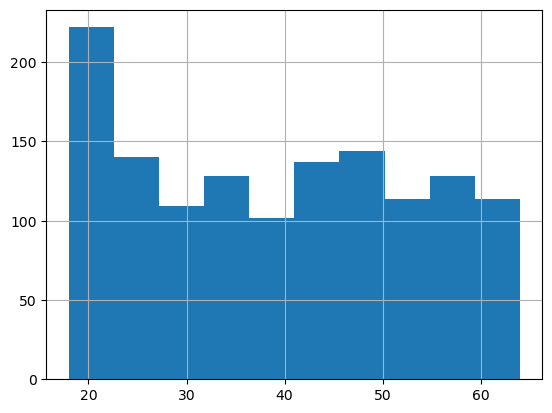

In [16]:
df['Age'].hist()

<Axes: >

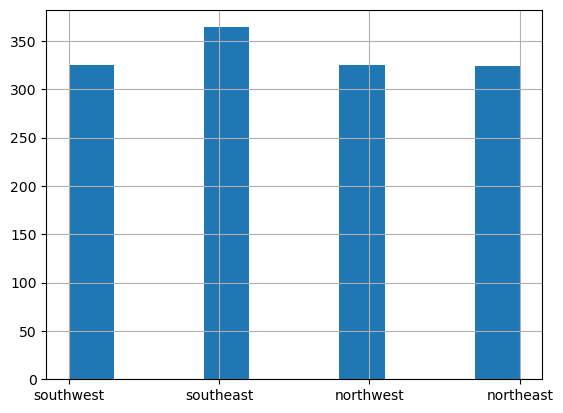

In [17]:
df['Region'].hist()

<Axes: >

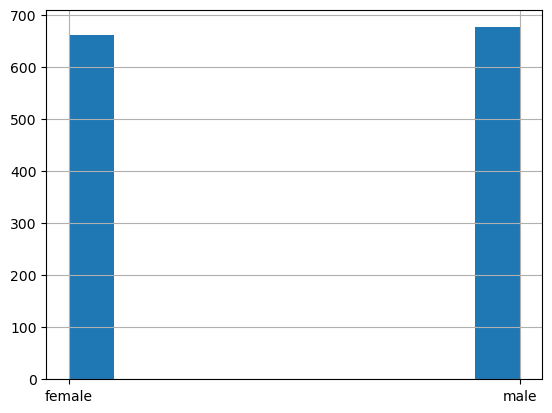

In [18]:
df['Gender'].hist()

<Axes: >

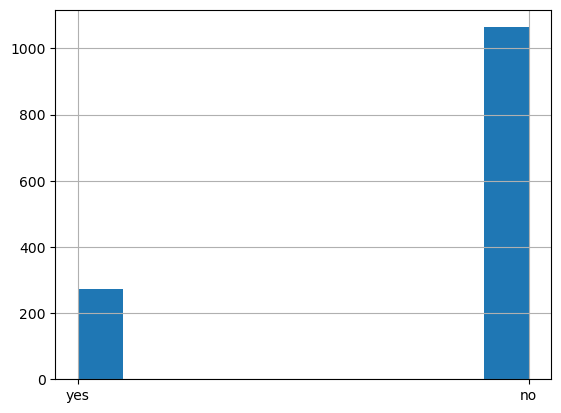

In [19]:
df['Smoker'].hist()

<Axes: >

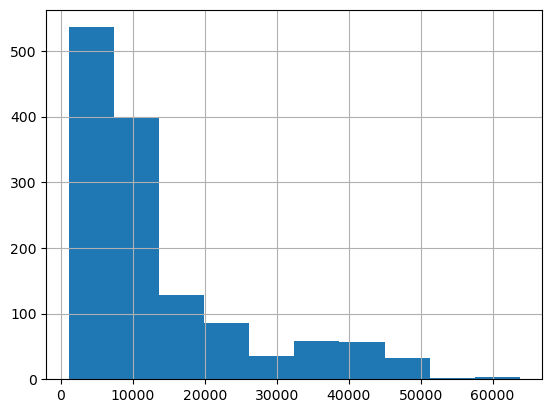

In [21]:
df['Cost ($)'].hist()

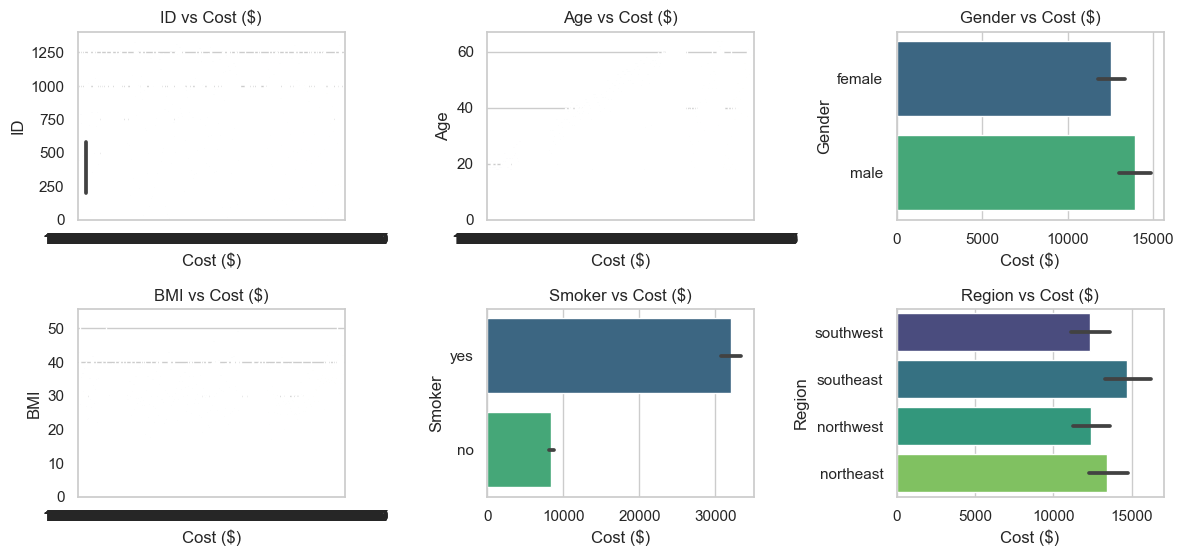

In [76]:
df = pd.read_csv('Regression-Dataset.csv')

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
for feature in df.columns[:-1]:  # Exclude the target variable
    plt.subplot(3, 3, df.columns.get_loc(feature) + 1)
    sns.barplot(x='Cost ($)', y=feature, data=df, palette="viridis")
    plt.title(f"{feature} vs Cost ($)")

plt.tight_layout()
plt.show()

Best Hyperparameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None}

Linear Regression Metrics:
Mean Squared Error (MSE): 34919850.77476338
R-squared: 0.75


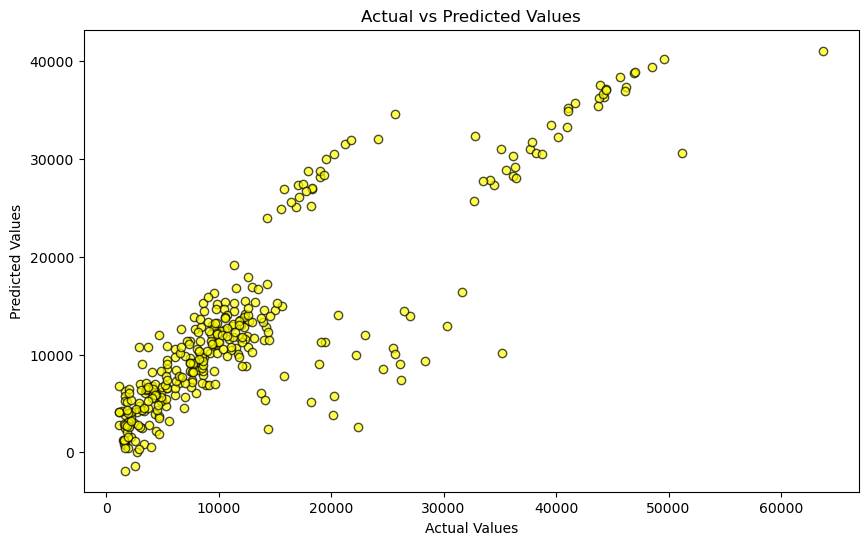

In [57]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Ridge, Lasso


X=df.drop('Cost ($)',axis=1)
y=df['Cost ($)']
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
# Define the parameter grid
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [None, -1]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# Fit the model to the data
grid_search.fit(X_train, y_train)
# Get the best hyperparameters
best_params = grid_search.best_params_
# Create a new LinearRegression model with the best hyperparameters
best_model = LinearRegression(**best_params)
# Now you can fit the new model to your data
best_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Best Hyperparameters:", best_params)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', round(r2, 2))

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='yellow', edgecolors='k')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


Ridge Regression Metrics:
Best Hyperparameters: {'alpha': 10.0}
Mean Squared Error (MSE): 34463929.86057034
R-squared: 0.76

Lasso Regression Metrics:
Best Hyperparameters: {'alpha': 10.0}
Mean Squared Error (MSE): 34390682.21062779
R-squared: 0.76


Text(0, 0.5, 'Frequency')

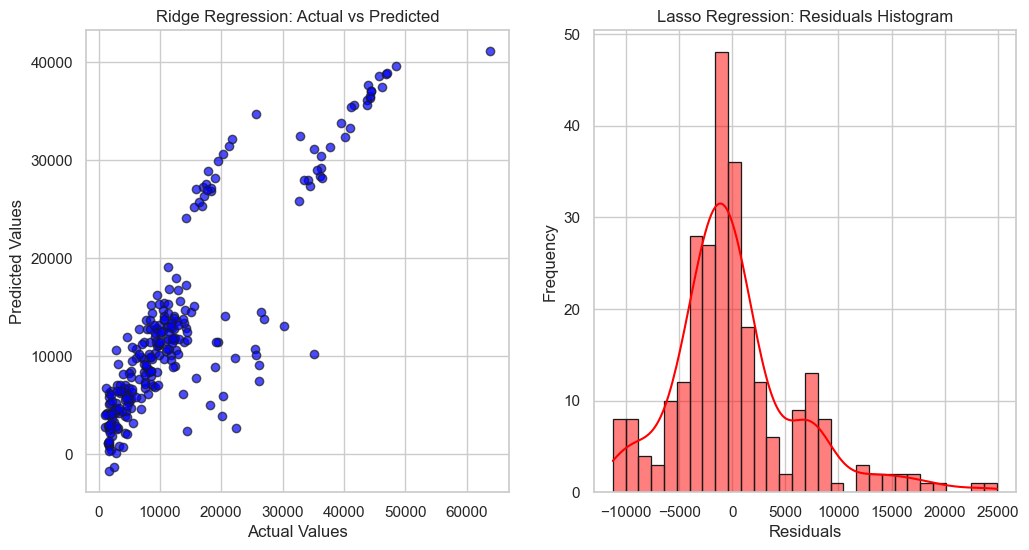

In [79]:
X=df.drop('Cost ($)',axis=1)
y=df['Cost ($)']
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Ridge Regression
ridgeParams = {'alpha': [0.1, 1.0, 10.0]}  
ridgeModel = Ridge()
ridgeGrid = GridSearchCV(ridgeModel, ridgeParams, cv=5, scoring='neg_mean_squared_error')
ridgeGrid.fit(X_train, y_train)
ridge_best_model = ridgeGrid.best_estimator_
yPredRidge = ridge_best_model.predict(X_test)

# Lasso Regression
lassoParams = {'alpha': [0.1, 1.0, 10.0]}  
lassoModel = Lasso()
lassoGrid = GridSearchCV(lassoModel, lassoParams, cv=5, scoring='neg_mean_squared_error')
lassoGrid.fit(X_train, y_train)
lasso_best_model = lassoGrid.best_estimator_
y_pred_lasso = lasso_best_model.predict(X_test)

mse_ridge = mean_squared_error(y_test, yPredRidge)
r2_ridge = r2_score(y_test, yPredRidge)
print('\nRidge Regression Metrics:')
print('Best Hyperparameters:', ridgeGrid.best_params_)
print('Mean Squared Error (MSE):', mse_ridge)
print('R-squared:', round(r2_ridge, 2))

# Scatter plot for Ridge Regression
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, yPredRidge, alpha=0.7, color='blue', edgecolors='k')
plt.title('Ridge Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Evaluate Lasso Regression
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print('\nLasso Regression Metrics:')
print('Best Hyperparameters:', lassoGrid.best_params_)
print('Mean Squared Error (MSE):', mse_lasso)
print('R-squared:', round(r2_lasso, 2))

residuals_lasso = y_test - y_pred_lasso
plt.subplot(1, 2, 2)
sns.histplot(residuals_lasso, bins=30, color='red', edgecolor='k', kde=True)
plt.title('Lasso Regression: Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')